In [2]:
import numpy as np
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
import pandas
import networkx as nx
import mahotas
import sknw
import glob
import os

In [3]:
morph = np.array(pandas.read_csv('data/data_0.558_2.4_000060.txt', delimiter=' ', header=None)).swapaxes(0, 1)
skel, distance = medial_axis(morph, return_distance=True)

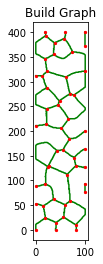

In [35]:
graph = sknw.build_sknw(skel)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green', zorder=-1)
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes], dtype = int)
plt.scatter(ps[:,1], ps[:,0], s = 5, c ='r')

# title and show
plt.title('Build Graph')

plt.gca().set_aspect('equal')
plt.savefig('my_plot.png',dpi=1200)


In [36]:
plt.show()



In [15]:
nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53))

In [30]:
morph.shape


(401, 101)

In [10]:
os.chdir(r'/Users/devyanijivani/git/pygraspi/notebooks/data')
dest = "/Users/devyanijivani/git/pygraspi/notebooks/junctions"
myFiles = glob.glob('*.txt')
myFiles.sort()

for i, file in enumerate(myFiles):
    morph = np.array(pandas.read_csv(file, delimiter=' ', header=None)).swapaxes(0, 1)
    skel, distance = medial_axis(morph, return_distance=True)
    graph = sknw.build_sknw(skel)
    for (s,e) in graph.edges():
        ps = graph[s][e]['pts']
        plt.plot(ps[:,1], ps[:,0], 'green', zorder=-1)

    # draw node by o
    nodes = graph.nodes()
    ps = np.array([nodes[i]['o'] for i in nodes], dtype = int)
    plt.scatter(ps[:,1], ps[:,0], s = 1, c ='r')

    # title and show
    plt.title('Build Graph')
    
    plt.gca().set_aspect('equal')
    print(os.path.splitext(file)[0])
    
    file_loc = os.path.join(dest, os.path.splitext(file)[0]+'.png')
    #print(file_loc)
    plt.savefig(file_loc,dpi=1200)
    
    plt.close()


data_0.514_2.4_000080
data_0.514_2.4_000100
data_0.514_2.4_000140
data_0.514_2.4_000160
data_0.514_2.4_000180
data_0.514_2.4_000220
data_0.514_2.4_000280
data_0.514_2.4_000440
data_0.514_2.4_000480
data_0.514_2.4_000560
data_0.514_2.4_000620
data_0.514_2.4_000760
data_0.514_2.4_000880
data_0.514_2.4_001240
data_0.514_2.4_001800
data_0.514_2.4_002480
data_0.514_2.4_004660
data_0.514_2.4_006400
data_0.514_2.6_000080
data_0.514_2.6_000100
data_0.514_2.6_000140
data_0.514_2.6_000180
data_0.514_2.6_000220
data_0.514_2.6_000240
data_0.514_2.6_000260
data_0.514_2.6_000340
data_0.514_2.6_000420
data_0.514_2.6_000460
data_0.514_2.6_000540
data_0.514_2.6_000600
data_0.514_2.6_000680
data_0.514_2.6_000980
data_0.514_2.6_002660
data_0.514_2.6_004160
data_0.514_2.6_005600
data_0.514_2.6_006460
data_0.514_2.8_000100
data_0.514_2.8_000120
data_0.514_2.8_000140
data_0.514_2.8_000200
data_0.514_2.8_000240
data_0.514_2.8_000320
data_0.514_2.8_000400
data_0.514_2.8_000460
data_0.514_2.8_000600
data_0.514

data_0.543_2.4_000100
data_0.543_2.4_000160
data_0.543_2.4_000200
data_0.543_2.4_000240
data_0.543_2.4_000280
data_0.543_2.4_000320
data_0.543_2.4_000460
data_0.543_2.4_000600
data_0.543_2.4_000740
data_0.543_2.4_001040
data_0.543_2.4_001300
data_0.543_2.4_001400
data_0.543_2.4_001980
data_0.543_2.4_003400
data_0.543_2.4_005620
data_0.543_2.4_006400
data_0.543_2.6_000040
data_0.543_2.6_000060
data_0.543_2.6_000080
data_0.543_2.6_000100
data_0.543_2.6_000120
data_0.543_2.6_000140
data_0.543_2.6_000160
data_0.543_2.6_000200
data_0.543_2.6_000240
data_0.543_2.6_000300
data_0.543_2.6_000360
data_0.543_2.6_000440
data_0.543_2.6_000500
data_0.543_2.6_000560
data_0.543_2.6_000740
data_0.543_2.6_001240
data_0.543_2.6_002260
data_0.543_2.6_003380
data_0.543_2.6_003900
data_0.543_2.6_006020
data_0.543_2.8_000040
data_0.543_2.8_000080
data_0.543_2.8_000100
data_0.543_2.8_000120
data_0.543_2.8_000160
data_0.543_2.8_000200
data_0.543_2.8_000260
data_0.543_2.8_000360
data_0.543_2.8_000460
data_0.543

In [3]:
pwd

'/Users/devyanijivani/git/pygraspi/notebooks'